# 1. Dot Product

Write a function `matrix_multiply(A, B)` using for loops, `+` and `*` that takes in two matrices (can be list of lists, or 2d numpy array) and returns their dot product (matrix multiplication). It should work with column vectors ($k \times 1$ dimensions) and row vectors ($1 \times k$) normally.


```import numpy as np

A = [
    [1,2,3],
    [4,5,6]
]

B = [
    [1,2,3],
    [4,5,6],
    [7,8,9]
]

matrix_multiply(A,B)

RETURNS: 
[[30, 36, 42],
 [66, 81, 96]]

---------example 2-------------
# This is a row vector
A = np.array([
    [1,2,3]
])

# This is a column vector
B = np.array([
    [1],
    [4],
    [7]
])

matrix_multiply(A,B)

RETURNS:
[[30]]

```

Use `np.dot` to test your output

In [11]:
def matrix_multiply(A,B):
    x = []
    for i in range(0,len(A)):
        y = []
        for j in range(0,len(B[0])):
            z = 0
            for k in range(0,len(A[0])):
                z += A[i][k]*B[k][j]
            y.append(z)
        x.append(y)
        
    return x

A = [ [1,2,3], [4,5,6] ]

B = [ [1,2,3], [4,5,6], [7,8,9] ]

matrix_multiply(A,B)

[[30, 36, 42], [66, 81, 96]]

In [12]:
np.dot(A,B)

array([[30, 36, 42],
       [66, 81, 96]])

In [9]:
import numpy as np

A = np.array([ [1,2,3] ])
B = np.array([ [1], [4], [7] ])
matrix_multiply(A,B)

[[30]]

In [10]:
np.dot(A,B)

array([[30]])

# 2 Matrix Math torture

**2.1** Give a 3 examples of non-invertible square matrices that are non-zero

**2.2** Explain why the identity matrix $I$ is necessarily a square matrix with only $1$'s on the diagonal (hint: use the dot product from Q1)

**2.3** The **trace** is commutative for two matrices so $tr(AB) = tr(BA)$. Give an example where this is false for 3 matrices which can all be multiplied together.

**2.4** Give an example of a nonzero $4 \times 4$ idempotent matrix (where $A \cdot A = A^2 = A$)

**2.5** solve the following system of equations for `x`, `y` and `z` using matrices and `numpy.linalg.solve`

$$x 	+ 	y 	+ 	z 	= 	6$$

  	  	$$2y 	+ 	5z 	= 	−4$$

$$2x 	+ 	5y 	− 	z 	= 	27$$

In [13]:
#2.1)

print(np.matrix([[1,0], [0,0]]))
print(np.matrix([[9,6], [12,8]]))
print(np.matrix([[2,3], [4,6]]))

[[1 0]
 [0 0]]
[[ 9  6]
 [12  8]]
[[2 3]
 [4 6]]


2.2) This is because as long as the size of the matrix is considered, multiplying by the identity matrix with another matrix is like multiplying by 1 with regular numbers.

In [14]:
#2.3) 
A = np.array([[1,2,3],
              [4,5,6],
              [7,8,9]])

B = np.array([[1,2,3],
              [4,5,6],
              [5,3,1]])

C = np.array([[1,2,3],
              [4,5,6],
              [3,8,9]])

np.trace(A @ B @ C), np.trace(C @ B @ A)

(2349, 2253)

In [15]:
#2.4) 

x = np.matrix([[1,0,0,0],
               [0,1,0,0],
               [0,0,1,0],
               [0,0,0,1]])

np.square(x) #x^2 = x, therefore it is idempotent

matrix([[1, 0, 0, 0],
        [0, 1, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1]], dtype=int32)

In [16]:
#2.5)

coeffs = np.array([[1,1,1],
                   [0,2,5],
                   [2,5,-1]])

A = np.array([6, -4, 27])

np.linalg.solve(coeffs,A)

array([ 5.,  3., -2.])

# 3.1 Boston regression

Using statsmodels and the `boston` dataset, make a regression model to predict house prices. Don't forget to add a constant (intercept) term. Note that statsmodels can take a `pd.DataFrame` as an input for `X`.

Report the $R^2$ and coefficients on each feature

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.datasets import load_boston

boston = load_boston()
df = pd.DataFrame(boston.data, columns = boston.feature_names)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [96]:
y = boston.target
x = sm.add_constant(df)
est = sm.OLS(y, x).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 12 Jan 2021   Prob (F-statistic):          6.72e-135
Time:                        18:59:31   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 3.2 Polynomial features

Use polynomial features to improve your regression model in `2.1`. You can use squared and cubic features. Try to find a model that minimizes the `AIC` or `BIC` of your output table.

In [23]:
#LSTAT and CRIM and PTRATIO are variables that I think squaring or cubing could potentially improve the model

df['MEDV'] = boston.target

df['LSTAT2'] = df['LSTAT'] ** 2
df['LSTAT3'] = df['LSTAT'] ** 3
df['PTRATIO2'] = df['PTRATIO'] ** 2
df['CRIM2'] = df['CRIM'] ** 2

#Get rid of useless columns (high p-value columns)

df = df.drop(columns=['INDUS', 'ZN'])

In [20]:
y = df['MEDV']
x = df.drop(columns=['MEDV'])
est = sm.OLS(y, sm.add_constant(x)).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     129.0
Date:                Wed, 13 Jan 2021   Prob (F-statistic):          3.07e-159
Time:                        15:31:51   Log-Likelihood:                -1435.6
No. Observations:                 506   AIC:                             2903.
Df Residuals:                     490   BIC:                             2971.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        105.9030     15.580      6.798      0.000      75.292     136.514
CRIM          -0.3402      0.088     -3.867      0.000      -0.513      -0.167
CHAS           2.6310      0.768      3.428      0.001       1.123       4.139
NOX          -19.9142      3.380     -5.892      0.000     -26.556     -13.273
RM             2.3988      0.405      5.925      0.000       1.603       3.194
AGE            0.0232      0.012      1.920      0.055      -0.001       0.047
DIS           -1.1698      0.157     -7.461      0.000      -1.478      -0.862
RAD            0.3806      0.064      5.960      0.000       0.255       0.506
TAX           -0.0107      0.003     -3.604      0.000      -0.017      -0.005
PTRATIO       -6.7470      1.573     -4.290      0.000      -9.837      -3.657
B              0.0071      0.002      2.952      0.003       0.002       0.012
LSTAT         -2.6374      0.300     -8.784      0.000      -3.227      -2.047
LSTAT2         0.0902      0.018      4.924      0.000       0.054       0.126
LSTAT3        -0.0010      0.000     -2.926      0.004      -0.002      -0.000
PTRATIO2       0.1668      0.045      3.736      0.000       0.079       0.254
CRIM2          0.0026      0.001      2.278      0.023       0.000       0.005
==============================================================================
Omnibus:                      138.039   Durbin-Watson:                   1.238
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              679.288
Skew:                           1.108   Prob(JB):                    3.12e-148
Kurtosis:                       8.226   Cond. No.                     7.16e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.16e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 3.3 Feature plotting

Now that you have a better model, make a regression figure plot for the important feature. The regression plot should be like the ones made at the end of part 3 of this lecture (scatterplot + regression line). It should have the following:

- Have the `x` axis be the values from one of your important features. The values should range from the `[min, max]` of the observed values in the dataset.

- The y axis on each chart is the target value (house price)

- You should have a scatter plot of the datapoints for the feature + the regression line of predicted values on each

- If you used non-linearities (squared and/or cube input) the regression curve should be nonlinear as well

- When plotting values for a single variable, you can set all the other values to their `mean` or `median` when you put them in your model's prediction

Text(0.5, 0, '% of People of Lower Status (LSTAT)')

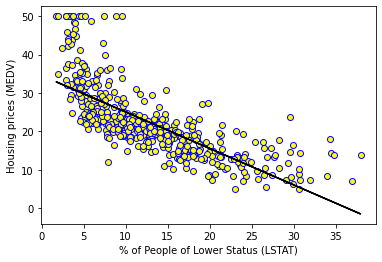

In [77]:
x = df.LSTAT
x = sm.add_constant(x)
est = sm.OLS(y, x).fit()
yfit = est.predict(x)
fig, ax = plt.subplots()
ax.scatter(x.LSTAT, y, color = 'yellow', edgecolors='blue')
ax.plot(x.LSTAT, yfit, 'black')
plt.ylabel("Housing prices (MEDV)")
plt.xlabel("% of People of Lower Status (LSTAT)")

# 3.4 Multi-feature plotting

Make a single matplotlib `figure` object with the same chart as in **2.4** but with 4 charts instead for your 4 most important features. 

Do not copy-paste code for each feature you visualize in the plot. Extract your code into a function so you can just have something like

```python
fix, ax1, ax2, ax3, ax4 = plt.subplots((2,2))
reg_plot_on_ax(feature_1, ax1)
reg_plot_on_ax(feature_2, ax2)
reg_plot_on_ax(feature_3, ax3)
reg_plot_on_ax(feature_4, ax4)
```

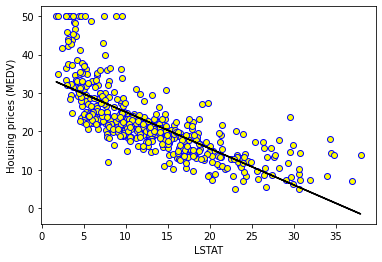

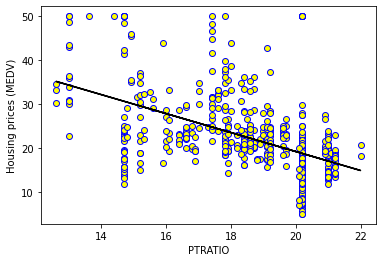

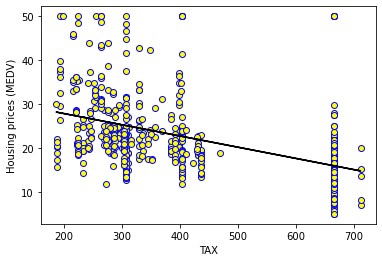

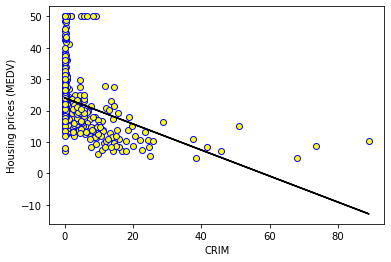

In [124]:
def reg_plot_on_ax(feature, ax):
    x = df[feature]
    x = sm.add_constant(x)
    est = sm.OLS(y, x).fit()
    yfit = est.predict(x)
    fig, ax = plt.subplots()
    ax.scatter(x[feature], y, color = 'yellow', edgecolors='blue')
    ax.plot(x[feature], yfit, 'black')


axes = [ax1, ax2, ax3, ax4]
features = ["LSTAT", "PTRATIO", "TAX", "CRIM"]
for i in range(len(features)):
    reg_plot_on_ax(features[i], axes[i])
    plt.xlabel(features[i])
    plt.ylabel('Housing prices (MEDV)')